In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import seaborn

In [2]:
artists = pd.read_csv("artists.csv").fillna('')
artworks = pd.read_csv("artworks.csv").fillna('')

In [3]:
def find_year(datestr):
    match = re.search('[1-2]\d\d\d', datestr)
    if match is None:
        return -1
    else:
        return int(match.group())

In [4]:
artworks['Year'] = artworks['Date'].apply(find_year)

In [5]:
medium = artworks[['Year', 'Medium', 'Classification']]
medium = medium.loc[np.vectorize(lambda s: isinstance(s, str))(medium['Medium'])]
medium = medium.loc[np.vectorize(lambda s: isinstance(s, str))(medium['Classification'])]

In [6]:
painting_medium = medium.loc[medium['Classification'] == 'Painting'].copy()
yearly = painting_medium.groupby('Year')['Medium'].count().to_frame()
yearly = yearly.rename(columns={'Medium': 'Total'})
yearly = yearly[yearly.index != -1]

mediums = ['Oil', 'Synthetic Polymer', 'Ink', 'Pencil', 'Casein', 'Metal', 'Charcoal', 'Crayon']
for me in mediums:
    painting_medium[me] = painting_medium['Medium'].apply(lambda s: me.lower() in s.lower())
    yearly[me+' Count'] = painting_medium.groupby('Year')[me].sum()
    yearly[me] = yearly[me+' Count'].rolling(window=10).sum() / yearly['Total'].rolling(window=10).sum()
   
painting_medium['Other'] = np.logical_not(painting_medium['Oil'])
for me in mediums:
    painting_medium['Other'] = np.logical_and(painting_medium['Other'], np.logical_not(painting_medium[me]))
yearly['Other Count'] = painting_medium.groupby('Year')['Other'].sum()
yearly['Other'] = yearly['Other Count'].rolling(window=10).sum() / yearly['Total'].rolling(window=10).sum()

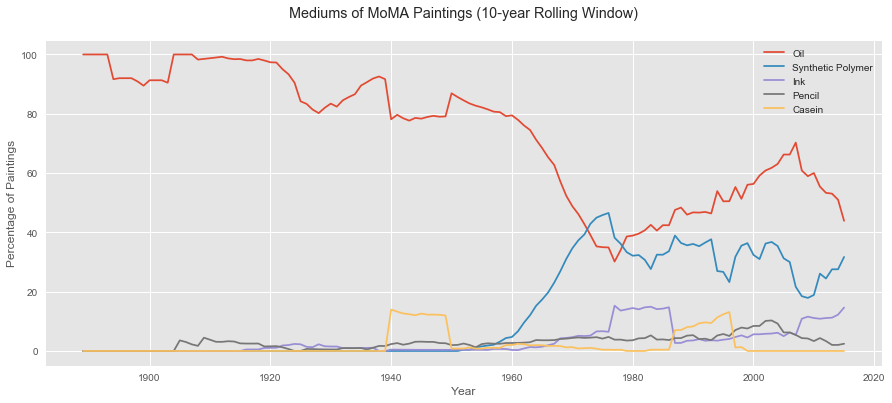

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Percentage of Paintings')
plt.title('Mediums of MoMA Paintings (10-year Rolling Window)', y=1.05)
for me in mediums[:-3]:
    plt.plot(100 * yearly[me].dropna(), label=me)
plt.legend()
plt.show()

In [8]:
mediums = ['Canvas', 'Wood', 'Paper', 'Metal', 'Linen']
for me in mediums:
    painting_medium[me] = painting_medium['Medium'].apply(lambda s: me.lower() in s.lower())
    yearly[me+' Count'] = painting_medium.groupby('Year')[me].sum()
    yearly[me] = yearly[me+' Count'].rolling(window=10).sum() / yearly['Total'].rolling(window=10).sum()
painting_medium['Other'] = np.logical_not(painting_medium['Oil'])
for me in mediums:
    painting_medium['Other'] = np.logical_and(painting_medium['Other'], np.logical_not(painting_medium[me]))
yearly['Other Count'] = painting_medium.groupby('Year')['Other'].sum()
yearly['Other'] = yearly['Other Count'].rolling(window=10).sum() / yearly['Total'].rolling(window=10).sum()

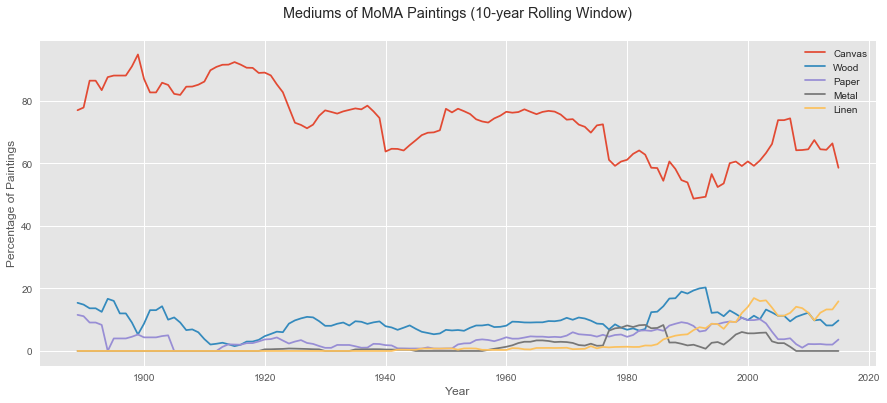

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Percentage of Paintings')
plt.title('Mediums of MoMA Paintings (10-year Rolling Window)', y=1.05)
for me in mediums:
    plt.plot(100 * yearly[me].dropna(), label=me)
#plt.plot(100 * yearly['Other'].dropna(), label='Other')
plt.legend()
plt.show()

In [10]:
from collections import Counter
words = re.findall(r'\w+', " ".join(painting_medium['Medium'].tolist()).lower())
Counter(words).most_common(50)

[('on', 2316),
 ('canvas', 1633),
 ('oil', 1569),
 ('and', 562),
 ('paint', 393),
 ('synthetic', 352),
 ('polymer', 346),
 ('board', 195),
 ('wood', 189),
 ('composition', 127),
 ('with', 125),
 ('tempera', 105),
 ('mounted', 89),
 ('ink', 82),
 ('paper', 79),
 ('pencil', 73),
 ('panels', 71),
 ('enamel', 68),
 ('casein', 58),
 ('in', 54),
 ('two', 51),
 ('painted', 49),
 ('metal', 46),
 ('linen', 45),
 ('parts', 41),
 ('charcoal', 38),
 ('fabric', 36),
 ('frame', 32),
 ('panel', 32),
 ('hardboard', 30),
 ('three', 30),
 ('over', 29),
 ('cardboard', 28),
 ('stamps', 28),
 ('silkscreen', 28),
 ('plywood', 27),
 ('postcard', 27),
 ('sand', 26),
 ('printed', 25),
 ('gesso', 24),
 ('wax', 24),
 ('aluminum', 23),
 ('collage', 22),
 ('of', 22),
 ('gouache', 22),
 ('poster', 22),
 ('burlap', 21),
 ('crayon', 20),
 ('four', 18),
 ('wire', 18)]

In [11]:
titles = artworks[['Date', 'Title']]
titles = titles.loc[np.vectorize(lambda s: isinstance(s, str))(titles['Title'])]
titles['Length'] = titles['Title'].apply(lambda s: len(s))
titles.sort_values(by='Length', ascending=False).head(10)

,Date,Title,Length
111096,2008,"Cutaway model Nikon EM. Shutter:, Electronical...",777
52451,"April 27, 1971",The Mission Council. Left to right: Hawthorne...,696
113631,2012,"Fig. 2: Loading the film (ORWO NP15 135-36, AS...",584
111099,2008,"Clockwise from Manufacturer Name (Outer Ring),...",501
60834,(1914-1915),.a The Standard Bearer (Bannerträger) for the ...,462
12806,1929,Stroitel'stvo Moskvy. Ezhemesiachnyi zhurnal M...,458
114256,2012,A Handley Page Halifax of No. 4 Group flies ov...,453
84132,(c. 1960s),116. At Jennie Richee. Notice by approach of b...,452
114176,1989,The Cathedral of St. John the Divine in Manhat...,437
114177,2013,"TecTake Luxus Strandkorb grau/weiß, Model no.:...",413


In [12]:
artists = pd.read_csv("artists.csv").fillna(np.nan)

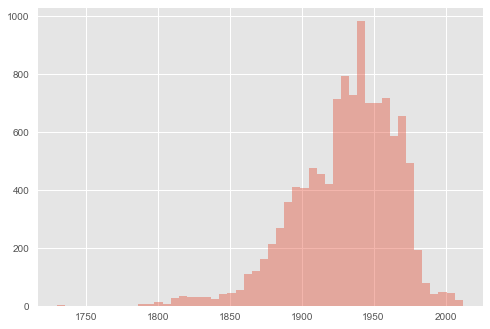

In [13]:
birth = np.array(list(filter(lambda x: not np.isnan(x), artists["Birth Year"])))
seaborn.distplot(birth, kde=False)
plt.show()

In [14]:
gender = np.array(list(filter(lambda x: not ((type(x) is float) and np.isnan(x)), artists["Gender"])))
gender = np.vectorize(str.lower)(gender)
gender, counts = np.unique(gender, return_counts=True)
print(gender)
print(counts)

['female' 'male']
[2193 9826]


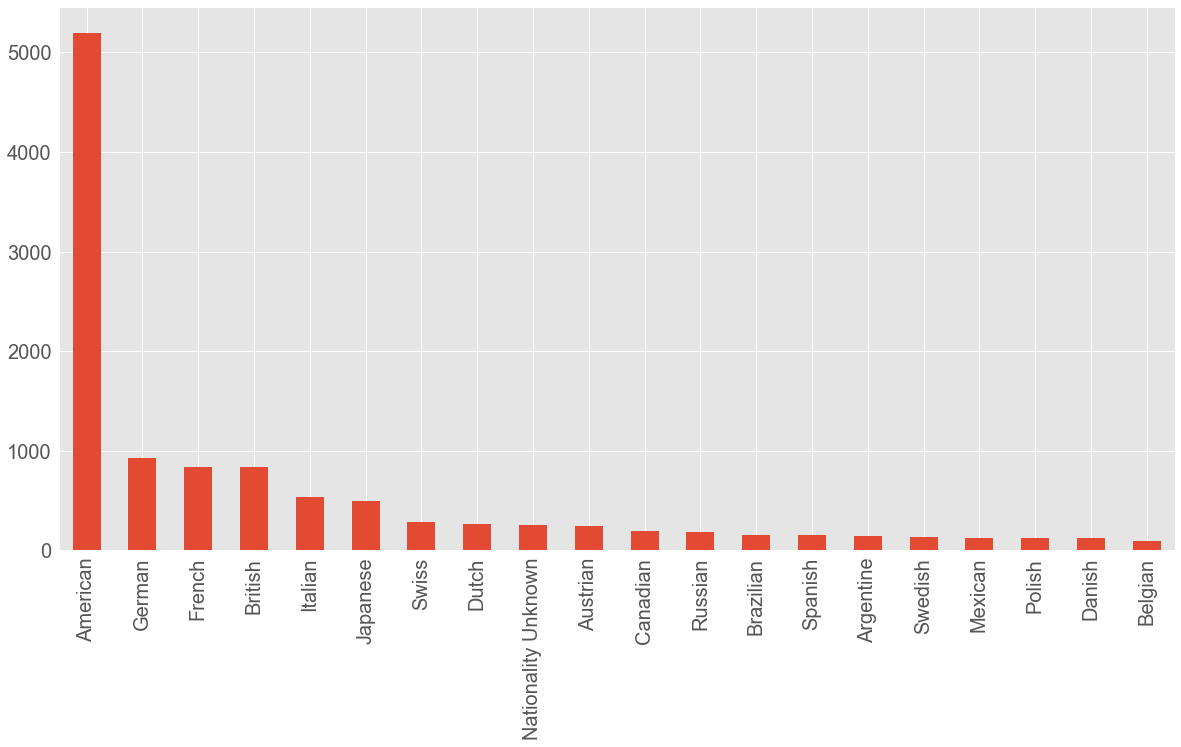

In [15]:
nation = np.array(list(filter(lambda x: not ((type(x) is float) and np.isnan(x)), artists["Nationality"])))
nation = np.vectorize(str.title)(nation)
nation, counts = np.unique(nation, return_counts=True)
s = pd.Series(counts, index=nation)
s = s.sort_values(ascending=False)
s.iloc[:20].plot(kind='bar', figsize=(20,10), fontsize=20)
plt.show()

In [129]:
maxartistid = int(pd.to_numeric(artworks['Artist ID'], errors='coerce').max())

In [135]:
workcount_arr = np.zeros(maxartistid+1, dtype=int)
for i, s in artworks['Artist ID'].iteritems():
    for j in [(x.strip()) for x in s.split(',')]:
        if j == '': continue
        try:
            workcount_arr[int(j)] += 1
        except ValueError:
            print 'Invalid id %s' % s

In [140]:
workcount = pd.Series(workcount_arr, name='Work Count')

In [141]:
artists = artists.join(workcount, on='Artist ID')

In [144]:
artists.sort_values('Work Count', ascending=False)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year,Work Count
197,229,Eugène Atget,French,Male,1857.0,1927.0,5050
631,710,Louise Bourgeois,American,Female,1911.0,2010.0,3363
6444,7166,Ludwig Mies van der Rohe,American,Male,1886.0,1969.0,2595
7547,8595,Unknown photographer,NaN,NaN,NaN,NaN,1656
1449,1633,Jean Dubuffet,French,Male,1901.0,1985.0,1436
1782,2002,Lee Friedlander,American,Male,1934.0,NaN,1335
4136,4609,Pablo Picasso,Spanish,Male,1881.0,1973.0,1323
944,1055,Marc Chagall,French,Male,1887.0,1985.0,1174
3437,3832,Henri Matisse,French,Male,1869.0,1954.0,1069
593,665,Pierre Bonnard,French,Male,1867.0,1947.0,909
